<a href="https://colab.research.google.com/github/Dasrunaik/AssignMents-ExcelR/blob/main/Assignment_15_recheck_XGBM_and_LGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [72]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [73]:
import lightgbm as lgb
import xgboost as xgb

Load Data

In [74]:
train_df=pd.read_csv('/content/Titanic_train.csv')
test_df=pd.read_csv('/content/Titanic_test.csv')

In [75]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Combine datasets

In [76]:
df=pd.concat([train_df,test_df],axis=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


EDA:Checking missing values

In [77]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


Impute missing values

In [78]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Removing unwanted Columns

In [79]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [80]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.000000,1,0,7.2500,S
1,1.0,1,female,38.000000,1,0,71.2833,C
2,1.0,3,female,26.000000,0,0,7.9250,S
3,1.0,1,female,35.000000,1,0,53.1000,S
4,0.0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
413,NaN,3,male,29.881138,0,0,8.0500,S
414,NaN,1,female,39.000000,0,0,108.9000,C
415,NaN,3,male,38.500000,0,0,7.2500,S
416,NaN,3,male,29.881138,0,0,8.0500,S


Encode categorical features

In [81]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [82]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.000000,1,0,7.2500,2
1,1.0,1,0,38.000000,1,0,71.2833,0
2,1.0,3,0,26.000000,0,0,7.9250,2
3,1.0,1,0,35.000000,1,0,53.1000,2
4,0.0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
413,NaN,3,1,29.881138,0,0,8.0500,2
414,NaN,1,0,39.000000,0,0,108.9000,0
415,NaN,3,1,38.500000,0,0,7.2500,2
416,NaN,3,1,29.881138,0,0,8.0500,2


Split Train/test

In [83]:
train=df[:len(train_df)]
test=df[len(test_df):]

In [84]:
X=train.drop('Survived',axis=1)
y=train['Survived']

train-test-split

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

LIGHTGBM MODEL

In [86]:
lgb_model = lgb.LGBMClassifier(force_row_wise=True,random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_val)
import warnings
warnings.filterwarnings('ignore')

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

XGBOOST MODEL

In [87]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)

In [88]:
y_pred_lgb

array([0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1.])

**Evaluation Metrics**

In [89]:
def evaluate_model(y_true, y_pred, name):
    print(f"\n{name} Classification Report:")
    print(classification_report(y_true, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")


LGBM evaluvation

In [90]:
evaluate_model(y_val, y_pred_lgb, "LightGBM")


LightGBM Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       105
         1.0       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
[[89 16]
 [16 58]]


XGBoost

In [91]:
evaluate_model(y_val, y_pred_xgb, "XGBoost")


XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       105
         1.0       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[89 16]
 [20 54]]


Cross-Validation

In [92]:
lgb_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy')
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [93]:
print(f"\nLightGBM CV Accuracy: {lgb_scores.mean():.4f}")
print(f"XGBoost CV Accuracy: {xgb_scores.mean():.4f}")



LightGBM CV Accuracy: 0.8238
XGBoost CV Accuracy: 0.8148


Future Importance Plot

In [94]:
def plot_importance(model, model_name):
    feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.title(f"{model_name} Feature Importance")
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

LGBM plot

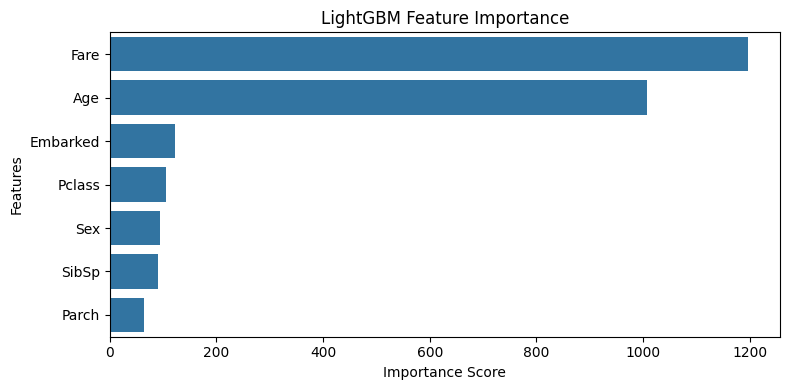

In [95]:
plot_importance(lgb_model, "LightGBM")

XGBoost

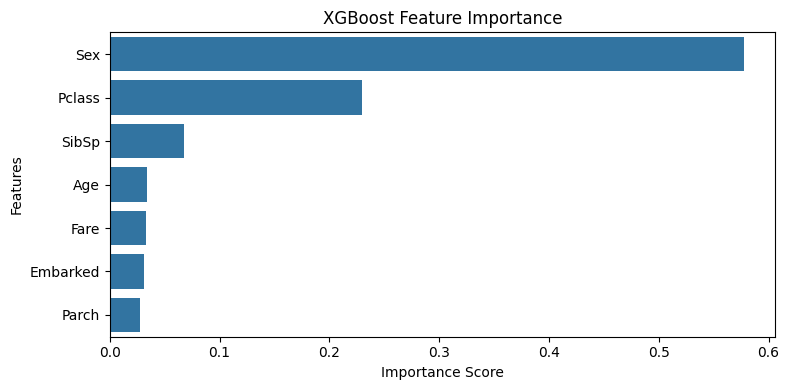

In [96]:
plot_importance(xgb_model, "XGBoost")


**CONCLUSION**

Both models are suitable and deliver highly competitive results. If quick prototyping is the goal, LightGBM is recommended. If interpretability and precision are more important, consider XGBoost with proper hyperparameter tuning.

Hyperparameter Tuning

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report


XGBoost Hyperparameter Tuning

In [98]:
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [99]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_random = RandomizedSearchCV(xgb_clf, xgb_params, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
xgb_random.fit(X_train, y_train)
xgb_best = xgb_random.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [100]:
print("Best Parameters for XGBoost:", xgb_random.best_params_)

Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


LightGBM Hyperparameter Tuning

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
lgbm_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 50],
    'boosting_type': ['gbdt', 'dart'],
    'subsample': [0.6, 0.8, 1.0]
}

lgbm_clf = LGBMClassifier()
lgbm_random = RandomizedSearchCV(lgbm_clf, lgbm_params, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
lgbm_random.fit(X_train, y_train)
lgbm_best = lgbm_random.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [103]:
print("Best Parameters for LightGBM:", lgbm_random.best_params_)

Best Parameters for LightGBM: {'subsample': 0.6, 'num_leaves': 50, 'n_estimators': 100, 'learning_rate': 0.05, 'boosting_type': 'gbdt'}


In-depth Comparative Analysis

 XGBoost Evaluation

In [110]:
xgb_preds = xgb_best.predict(X_test)
xgb_probs = xgb_best.predict_proba(X_test)
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("F1 Score:", f1_score(y_test, xgb_preds, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("Classification Report:\n", classification_report(y_test, xgb_preds))

XGBoost Performance:
Accuracy: 0.8100558659217877
F1 Score: 0.8091929317716401
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       105
         1.0       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



LightGBM Evaluation

In [113]:
lgbm_preds = lgbm_best.predict(X_test)
print("\\nLightGBM Performance:")
print("Accuracy:", accuracy_score(y_test, lgbm_preds))
print("F1 Score:", f1_score(y_test, lgbm_preds, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, lgbm_preds))
print("Classification Report:\n", classification_report(y_test, lgbm_preds))

\nLightGBM Performance:
Accuracy: 0.8435754189944135
F1 Score: 0.8432418695518452
Confusion Matrix:
 [[92 13]
 [15 59]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       105
         1.0       0.82      0.80      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179

